In [6]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [7]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

172091
401539
167802


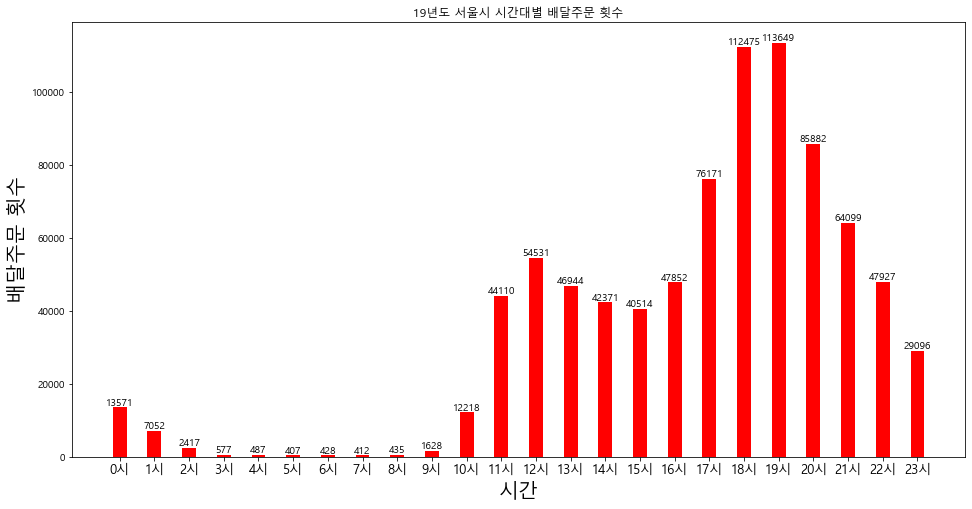

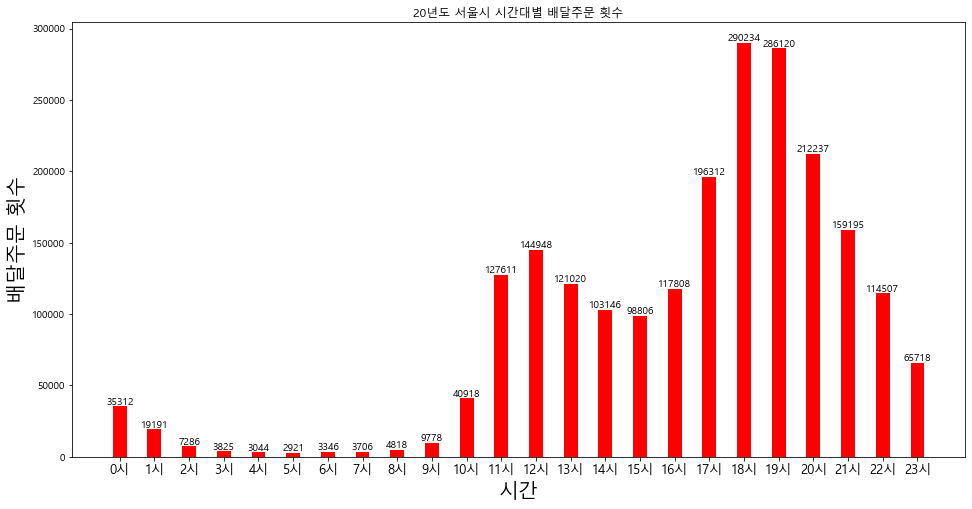

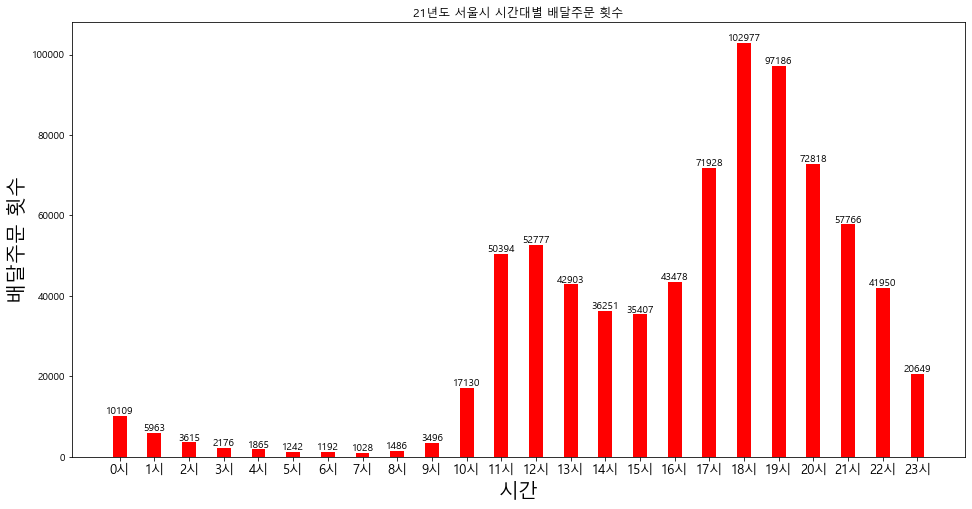

In [11]:
for year in [19,20,21]:

    Ori_df = pd.read_csv(f'{year}_시간대별주문.csv', encoding='utf-8-sig')

    Ori_df.columns = ['data','time','menu','region','gungu','order_cnt']

    Region_df = Ori_df.sort_values(by ='region')
    Seoul_df = Region_df.loc[Region_df['region'] == "서울특별시"]
    print(len(Seoul_df))
    Time_df = Seoul_df.sort_values(by = 'time')
    
    y = []
    xt = [str(i)+'시' for i in range(24)]

    x = np.arange(24)

    for t in range(24):
        temp_df = Time_df.loc[Time_df['time'] == t]
        total_cnt = 0
        for cnt in temp_df['order_cnt']:
            total_cnt += cnt
        y.append(total_cnt)

    plt.figure(figsize = (16,8))
    plt.bar(x - 0.2, y, color = 'r', align = 'edge',width = 0.4)
    plt.xticks(x, xt, size=13)
    #plt.legend()
    plt.xlabel('시간',size = 20)
    plt.ylabel('배달주문 횟수', size = 20)
    plt.title(f'{year}년도 서울시 시간대별 배달주문 횟수')

    for i, v in enumerate(x):
        plt.text(v , y[i], str(y[i]),
                 fontsize=10,
                 color="black",
                 horizontalalignment='center',
                 verticalalignment='bottom')
plt.show()